## Observations and Insights 

In [1]:
%matplotlib inline


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
metadata_study_ds=pd.merge(mouse_metadata,study_results, how="inner", on=["Mouse ID"] )


# Display the data table for preview
metadata_study_ds

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.

mice_nr = len(metadata_study_ds["Mouse ID"].unique())
mice_nr 

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mouse_ID=metadata_study_ds[metadata_study_ds.duplicated(["Mouse ID", "Timepoint"])]
duplicated_mouse_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_g989=metadata_study_ds.loc[metadata_study_ds["Mouse ID"]=="g989"]
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_df=metadata_study_ds.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)

Clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
Clean_df_mice_count = len(Clean_df["Mouse ID"].unique())
Clean_df_mice_count

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# create a dataframe grouped by drug regimen
drug_regim_df = Clean_df.groupby("Drug Regimen")

# calculate summary statistics of the tumor volume
tumor_mean =drug_regim_df["Tumor Volume (mm3)"].mean()
tumor_median =drug_regim_df["Tumor Volume (mm3)"].median()
tumor_variance =drug_regim_df["Tumor Volume (mm3)"].var()
tumor_std =drug_regim_df["Tumor Volume (mm3)"].std()
tumor_sem =drug_regim_df["Tumor Volume (mm3)"].sem()

# create a summary table to present the calculated values by drug regime

summary_drug_tumor_df=pd.DataFrame({"Mean":tumor_mean,
                                   "Median":tumor_median,
                                   "Variation":tumor_variance,
                                   "Standard Deviation":tumor_std,
                                   "SEM":tumor_sem})
summary_drug_tumor_df.head()




,Mean,Median,Variation,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

aggr_df = drug_regim_df.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
aggr_df.head()



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
Clean_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1883.00000,1883.000000,1883.000000,1883.000000,1883.000000
mean,12.77111,25.660648,19.622942,50.449310,1.025491
std,7.18380,3.931950,14.090045,8.914637,1.139284
min,1.00000,15.000000,0.000000,22.050126,0.000000
25%,7.00000,25.000000,5.000000,45.000000,0.000000
50%,13.00000,27.000000,20.000000,48.951368,1.000000
75%,20.00000,29.000000,30.000000,56.346321,2.000000
max,24.00000,30.000000,45.000000,78.567014,4.000000


## Bar and Pie Charts

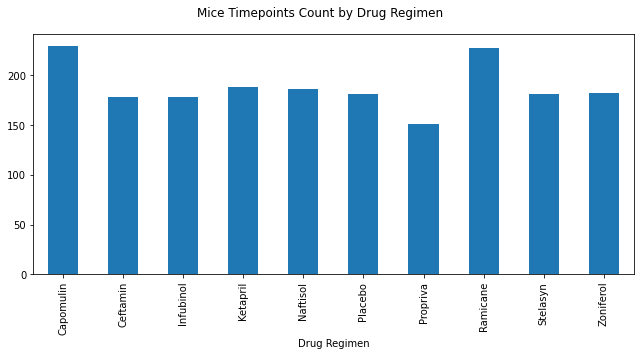

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

chart_df = metadata_study_ds.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)

timepoint_count = chart_df.groupby(['Drug Regimen'])['Timepoint'].count() 

timepoint_count.plot(kind="bar", figsize=(9,5))
plt.suptitle("Mice Timepoints Count by Drug Regimen")
plt.tight_layout()


([<matplotlib.axis.XTick at 0x1a17d6e83a0>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

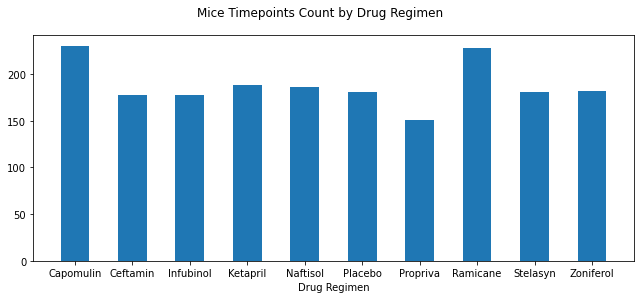

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
 
drug_regimen=(chart_df.groupby(["Drug Regimen"])["Drug Regimen"].count()).tolist()
x=np.arange(len(drug_regimen))

plt.figure(figsize=(9,4))


plt.bar(x, drug_regimen, width = 0.5, align="center")

plt.suptitle("Mice Timepoints Count by Drug Regimen")

plt.tight_layout()
plt.xlabel('Drug Regimen')

#plt.xticks(chart_df['Drug Regimen'])
values=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.xticks(x,values)


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


pie_df=metadata_study_ds.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)

pie_df=pie_df[["Mouse ID","Sex"]]
pie_df.head()

pie_df.groupby(["Sex"]).count().plot(kind="pie",y="Mouse ID")



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_df.plot(x="Sex", kind="pie",y="Mouse ID")

plt.show()




## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
